# Spherical Pendulum

After solving Euler-Lagrange Equation, we end up with
\begin{equation} \label{1} \tag{1}
\boxed{\ddot \theta = \sin{\theta} \cos{\theta} \dot \phi^2 - \frac{g}{l}\sin{\theta}} 
\end{equation}
and, 
\begin{equation} \label{2} \tag{2}
\boxed{\ddot \phi = -\frac{2\cos{\theta}}{\sin{\theta}}\dot \phi \dot \theta} 
\end{equation}

I broke these equation in four simulataneous DE.
For the equation \ref{1}
\begin{align}
\boxed{\frac{d \theta}{dt}= \omega} && \boxed{\frac{d \omega}{dt} = \sin{\theta} \cos{\theta}  \delta^2 - \frac{g}{l}\sin{\theta}}
\end{align}
and \ref{2}
\begin{align}
\boxed{\frac{d \phi}{dt}= \delta} && \boxed{\frac{d \delta}{dt} = -\frac{2\cos{\theta}}{\sin{\theta}}\delta \omega}
\end{align}

But for implimanting them in python I suppose
$\omega $=w; $\delta$=o; $\theta$=theta; $\phi$=phi

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sin, cos, pi, sqrt, exp
plt.style.use(['science', 'notebook', 'grid'])
from scipy.integrate import odeint

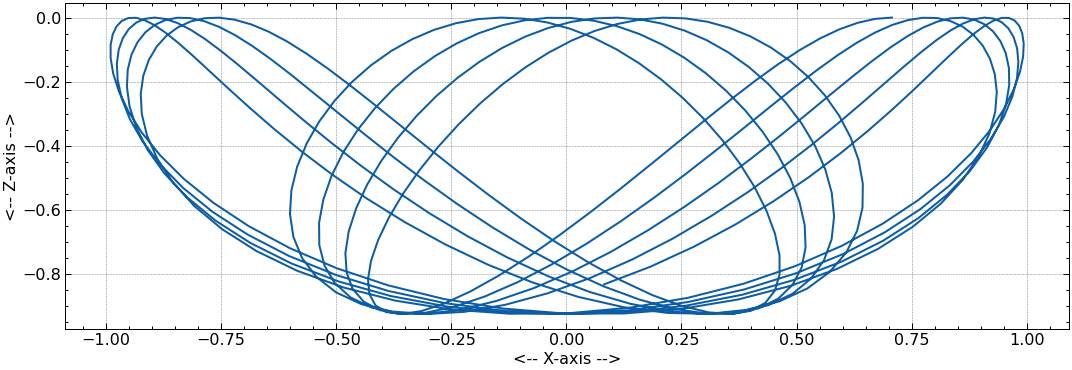

In [2]:
g = 9.8; l = 3

def dSdt(S, t):
    tht, w, phi, dlt = S
    return [w,
           np.sin(tht)*np.cos(tht)*dlt**2 - g*np.sin(tht)/l,
           dlt,
           -2*np.cos(tht)*dlt*w/np.sin(tht)]

S0 = np.pi/2, 0, np.pi/4, 1

t = np.linspace(0, 25, 500)

sol = odeint(dSdt, S0, t)
tht, w, phi, dlt = sol.T[0], sol.T[1], sol.T[2], sol.T[3]

x = sin(tht)*cos(phi)
y = sin(tht)*sin(phi)
z = -cos(tht)

plt.figure(figsize = (18, 6))
plt.plot(x, z, "")
plt.xlabel("<-- X-axis -->")
plt.ylabel("<-- Z-axis -->")
plt.show()

## For animation

In [ ]:
import vpython
from vpython import *
scene = canvas()
scene.forward = vec(0,-.3,-1)
ball = sphere(color = color.green, radius = 0.1, make_trail=True, retain=20)

rod = cylinder(pos=vector(0,0,0),axis=vector(0,0,0), radius=0.01)

base  = box(pos=vector(0,-4.25,0),axis=vector(1,0,0), size=vector(5,0.5,5))
s = cylinder(pos=vector(0,-3.99,0),axis=vector(0,-0.1,0), radius=0.5, color=color.gray(luminance=0.7))

i = 0
while True:
    rate(30)
    i = i + 1
    i = i % len(x)   # When i becomes len(x). Animation starts from beginning.
    ball.pos = vector(x[i], z[i], y[i])
    rod.axis = vector(x[i], z[i], y[i])
    s.pos = vector(x[i], -3.99, y[i])

# Using Euler Method
Be careful ❗❗ You have to take very very tiny time step.

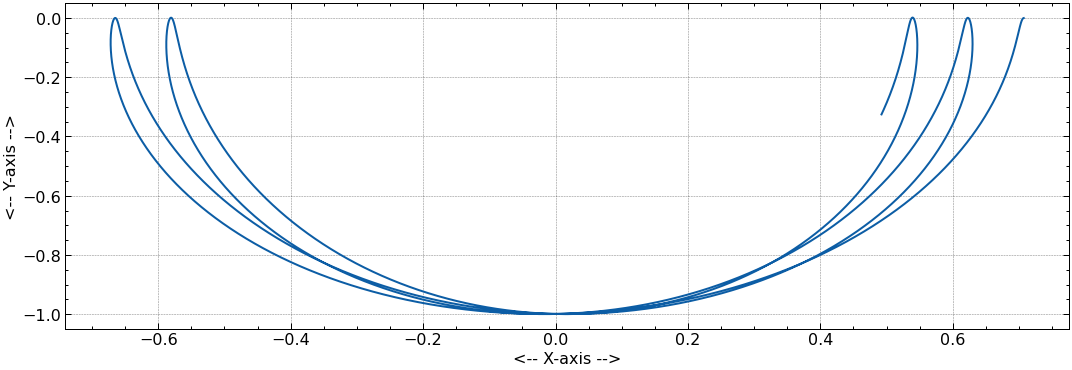

In [3]:
g = 9.8; l = 1

N = 100000
t, dt = np.linspace(0, 5, N, retstep = True)
tht, w, phi, dlt = np.zeros((N), ), np.zeros((N), ), np.zeros((N), ), np.zeros((N), ) 

tht[0], w[0], phi[0], dlt[0] = np.pi/2, 0, np.pi/4, 0.1

for i in range(N-1):
    tht[i+1] = tht[i] + dt*w[i]
    w[i+1] = w[i] + dt*(np.sin(tht[i])*np.cos(tht[i])*dlt[i]**2 - g*np.sin(tht[i])/l)
    phi[i+1] = phi[i] + dt*dlt[i]
    dlt[i+1] = dlt[i] + dt*(-2*np.cos(tht[i])*dlt[i]*w[i]/np.sin(tht[i]))
    
x = sin(tht)*cos(phi)
y = sin(tht)*sin(phi)
z = -cos(tht)

plt.figure(figsize = (18, 6))
plt.plot(x, z)
plt.xlabel("<-- X-axis -->")
plt.ylabel("<-- Y-axis -->")
plt.show()